In [4]:
%load_ext watermark
%watermark

Last updated: 2022-08-03T18:44:59.632189-05:00

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 76 Stepping 4, GenuineIntel
CPU cores   : 4
Architecture: 64bit



In [5]:
import pandas as pd
df = pd.read_csv("boston_dataset.csv")
df.head()

,TOWN,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


Renombraremos las columnas para que se entienda mejor lo que representa cada variable

In [6]:
df = df.rename(columns={
    "TOWN":"CIUDAD",
    "CRIM":"INDICE_CRIMEN",
    "ZN":"PCT_ZONA_RESIDENCIAL",
    "INDUS":"PCT_ZONA_INDUSTRIAL",
    "CHAS":"RIO_CHARLES",
    "NOX":"OXIDO_NITROSO_PPM",
    "RM":"N_HABITACIONES_MEDIO",
    "AGE":"PCT_CASAS_40S",
    "DIS_EMPLEO":"DISTANCIA_CENTRO_EMPLEO",
    "RAD":"DIS_AUTOPISTAS",
    "TAX":"CARGA_FISCAL",
    "PTRATIO":"RATIO_PROFESORES",
    "B":"PCT_NEGRA",
    "MEDV":"VALOR_MEDIANO",
    "LSTAT":"PCT_CLASE_BAJA"
})

df.head()

,CIUDAD,LON,LAT,VALOR_MEDIANO,INDICE_CRIMEN,PCT_ZONA_RESIDENCIAL,PCT_ZONA_INDUSTRIAL,RIO_CHARLES,OXIDO_NITROSO_PPM,N_HABITACIONES_MEDIO,PCT_CASAS_40S,DIS,DIS_AUTOPISTAS,CARGA_FISCAL,RATIO_PROFESORES,PCT_NEGRA,PCT_CLASE_BAJA
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [7]:
df.dtypes

CIUDAD                   object
LON                     float64
LAT                     float64
VALOR_MEDIANO           float64
INDICE_CRIMEN           float64
PCT_ZONA_RESIDENCIAL    float64
PCT_ZONA_INDUSTRIAL     float64
RIO_CHARLES               int64
OXIDO_NITROSO_PPM       float64
N_HABITACIONES_MEDIO    float64
PCT_CASAS_40S           float64
DIS                     float64
DIS_AUTOPISTAS            int64
CARGA_FISCAL              int64
RATIO_PROFESORES        float64
PCT_NEGRA               float64
PCT_CLASE_BAJA          float64
dtype: object

[Pagina que ayuda a ver que gráfico usar](https://www.juiceanalytics.com/chartchooser)

Empezaremos con el grafico de dispersión que muestra la relación entre 2 variables

**alpha** sera la opacidad, para que podamos distinguir mejor la densidad de puntos

<IPython.core.display.Javascript object>


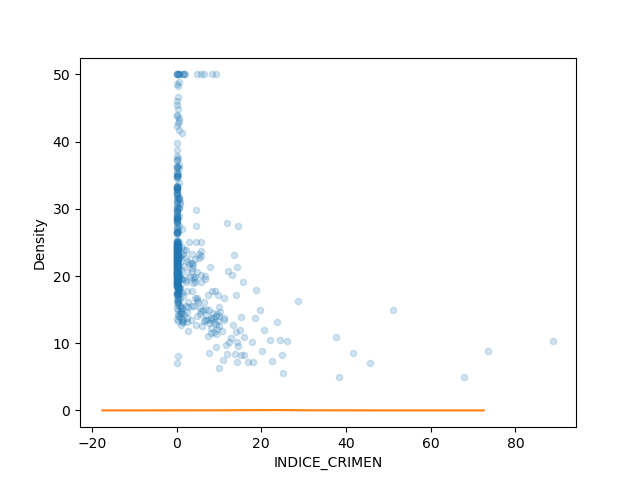

<AxesSubplot:xlabel='INDICE_CRIMEN', ylabel='VALOR_MEDIANO'>

In [17]:
df.plot(x="INDICE_CRIMEN", y="VALOR_MEDIANO", alpha=.2, kind = "scatter")

In [9]:
import matplotlib.pyplot as plt

In [11]:
%matplotlib notebook

Grafico matriz de dispersion:

In [12]:
from pandas.plotting import scatter_matrix

<IPython.core.display.Javascript object>


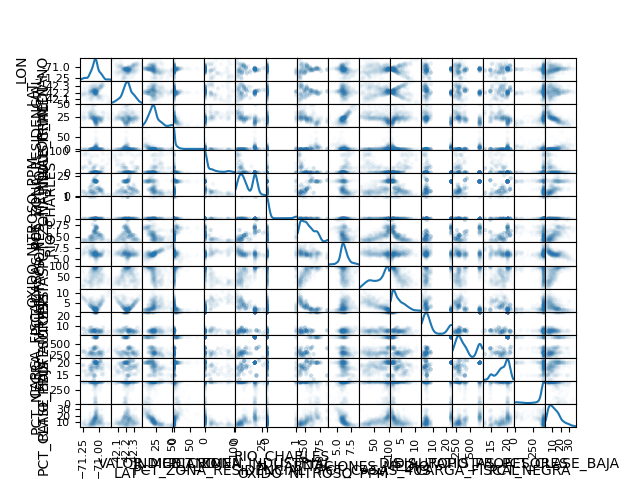

In [16]:
sm = scatter_matrix(df, alpha=.02, diagonal = "kde")

<IPython.core.display.Javascript object>


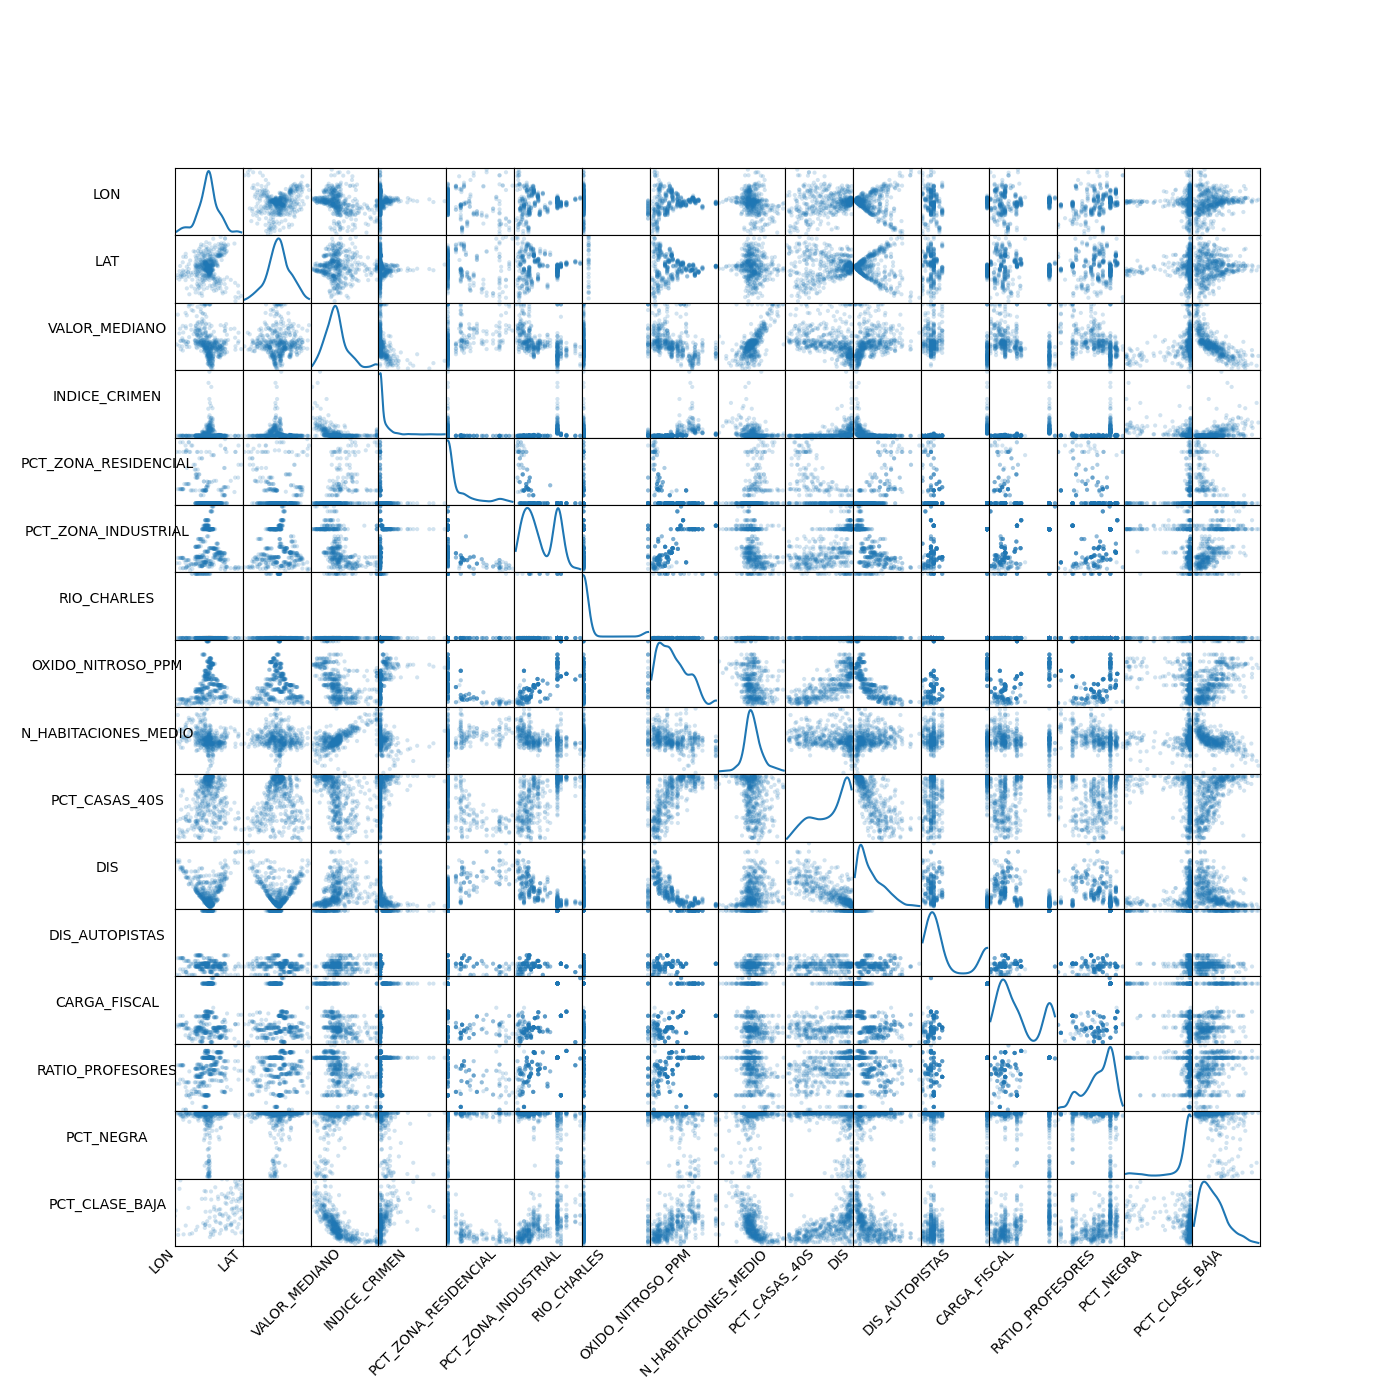

In [18]:
sm = scatter_matrix(df, alpha=0.2, figsize=(14, 14), diagonal='kde')

#https://stackoverflow.com/questions/32560932/how-to-customize-a-scatter-matrix-to-see-all-titles
#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]
[s.get_xaxis().set_label_coords(-0.2,0) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)];

In [20]:
df.VALOR_MEDIANO.plot(kind="kde")

<AxesSubplot:xlabel='INDICE_CRIMEN', ylabel='Density'>

In [21]:
%matplotlib inline

<AxesSubplot:ylabel='Density'>

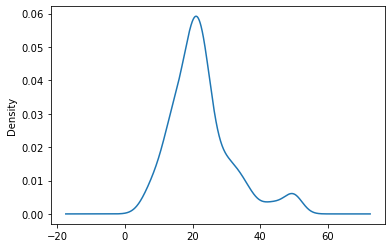

In [22]:
df.VALOR_MEDIANO.plot(kind="kde")

<AxesSubplot:ylabel='Frequency'>

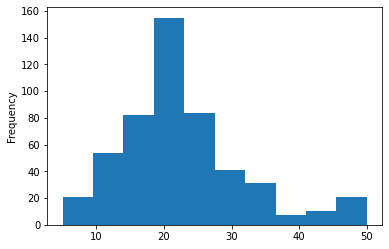

In [23]:
df.VALOR_MEDIANO.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

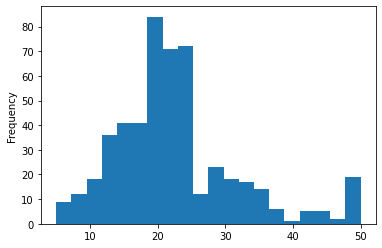

In [24]:
df.VALOR_MEDIANO.plot(kind="hist", bins = 20)

<AxesSubplot:ylabel='Frequency'>

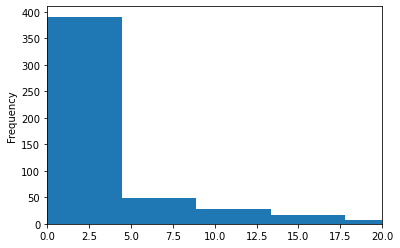

In [26]:
df.INDICE_CRIMEN.plot(kind="hist", bins = 20, xlim =(0,20))

<AxesSubplot:ylabel='Frequency'>

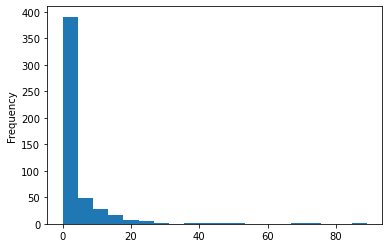

In [27]:
df.INDICE_CRIMEN.plot(kind="hist", bins = 20)

Grafico de barras

In [28]:
valor_por_ciudad = df.groupby("CIUDAD")["VALOR_MEDIANO"].mean()
valor_por_ciudad.head()

CIUDAD
Arlington    25.2
Ashland      21.4
Bedford      30.1
Belmont      36.2
Beverly      20.8
Name: VALOR_MEDIANO, dtype: float64

<AxesSubplot:xlabel='CIUDAD'>

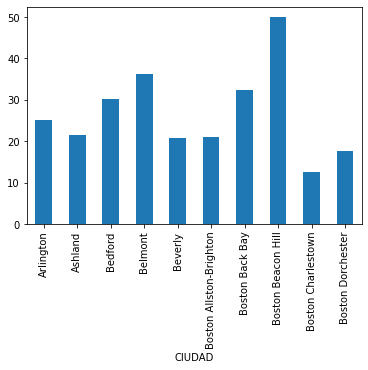

In [29]:
valor_por_ciudad.head(10).plot(kind="bar")

<AxesSubplot:ylabel='CIUDAD'>

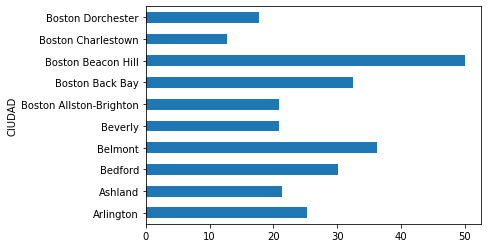

In [31]:
valor_por_ciudad.head(10).plot(kind="barh")

<AxesSubplot:ylabel='RIO_CHARLES'>

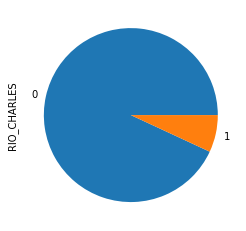

In [32]:
df.RIO_CHARLES.value_counts().plot(kind="pie")

Text(0.5, 1.0, 'Casas que estan cerca del rio')

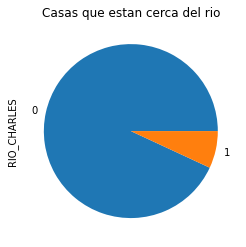

In [33]:
df.RIO_CHARLES.value_counts().plot(kind="pie")
plt.title("Casas que estan cerca del rio")

**Nota** modificar una grafica debe ser en la misma celda

Text(0, 0.5, 'Valor mediano de las viviendas (MDD)')

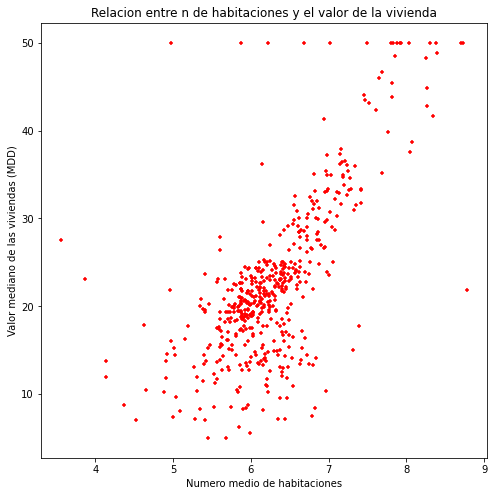

In [38]:
df.plot(x="N_HABITACIONES_MEDIO", y= "VALOR_MEDIANO", kind= "scatter", marker="+", color = "red", figsize = (8,8))
plt.title("Relacion entre n de habitaciones y el valor de la vivienda")
plt.xlabel("Numero medio de habitaciones")
plt.ylabel("Valor mediano de las viviendas (MDD)")

figsize se mide en pulgadas

In [40]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [41]:
plt.style.use("fivethirtyeight")

Text(0, 0.5, 'Valor mediano de las viviendas (MDD)')

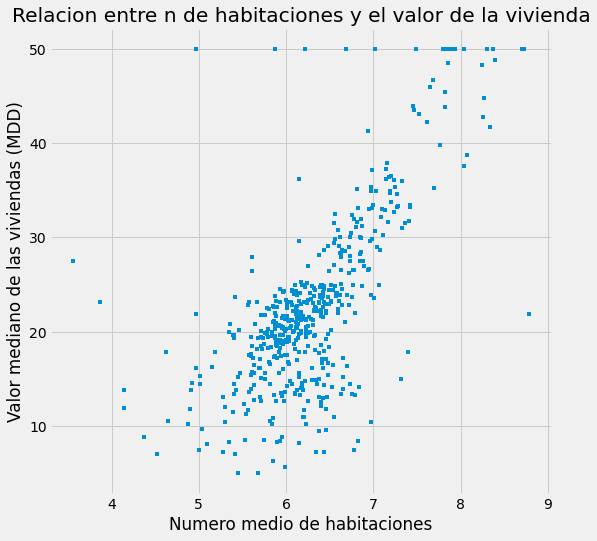

In [42]:
df.plot(x="N_HABITACIONES_MEDIO", y= "VALOR_MEDIANO", kind= "scatter", marker="+", figsize = (8,8))
plt.title("Relacion entre n de habitaciones y el valor de la vivienda")
plt.xlabel("Numero medio de habitaciones")
plt.ylabel("Valor mediano de las viviendas (MDD)")

Interact

Funcion de ipywidgets, sirve para interacuar con plots

In [43]:
#!conda install -c conda-forge ipywidgets


Solving environment: ...working... done

# All requested packages already installed.

